In [33]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve



from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

In [34]:
df=pd.read_csv("../../prepared_ravdess_features.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [35]:
df_copy=df.copy()

cat_var=["vocal_channel","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,normal,0,1,0,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,normal,0,0,0,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,1,happy,strong,0,1,0,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,normal,1,0,0,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,strong,0,1,0,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [36]:
# one-hot encoding of categorical feature "emotion"
categorical_col = ["emotion"]

df_copy = pd.get_dummies(df_copy, columns=categorical_col)
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,normal,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,normal,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,strong,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,normal,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,strong,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [37]:
le=preprocessing.LabelEncoder()
df_copy["emotional_intensity"]=le.fit_transform(df_copy["emotional_intensity"])
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [38]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [39]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    #print(roc_auc_score(y_test, y_tmp))
    print(roc_auc_score(y_test, y_tmp[:,1]))

In [40]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [41]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()  

In [42]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [43]:
# Normalizzazione delle variabili numeriche pure

df_normalized = df_copy.copy()

numeric_features = [n for n in df_normalized.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex"]

scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_normalized[numeric_features])
df_normalized[numeric_features] = scaled_features

In [44]:
col=[x for x in df_normalized.columns if x!="emotional_intensity"]
X=df_normalized[col].values
y = np.array(df_normalized["emotional_intensity"])

#holdout
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [45]:
# Esperimento 1: hyperparameters tuning with "f1_macro"    

check_params = {
    "n_neighbors": np.arange(3,30,2), 
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}

clf=KNeighborsClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.831 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.793 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.774 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.761 (+/-0.015) for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
1.

In [52]:
learner = KNeighborsClassifier(n_neighbors= 21, metric= 'manhattan', weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       383
           1       0.79      0.55      0.65       343

    accuracy                           0.72       726
   macro avg       0.74      0.71      0.71       726
weighted avg       0.74      0.72      0.71       726



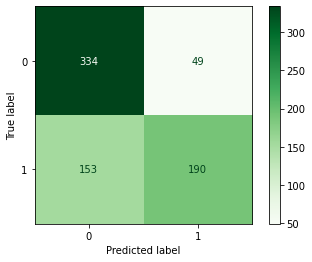

In [59]:
print_confMatrix(y_test,predictions)

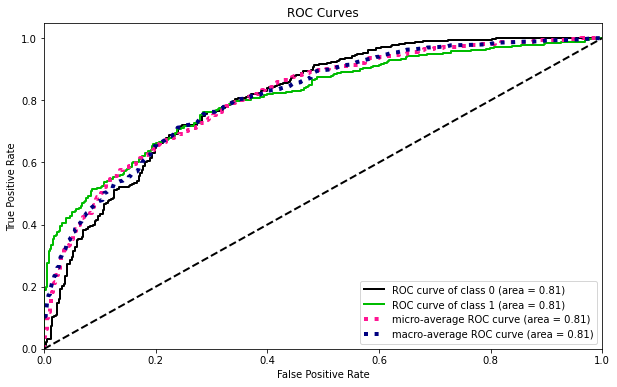

0.8094984357040094


In [60]:
print_rocCurve(learner,X_test,y_test)

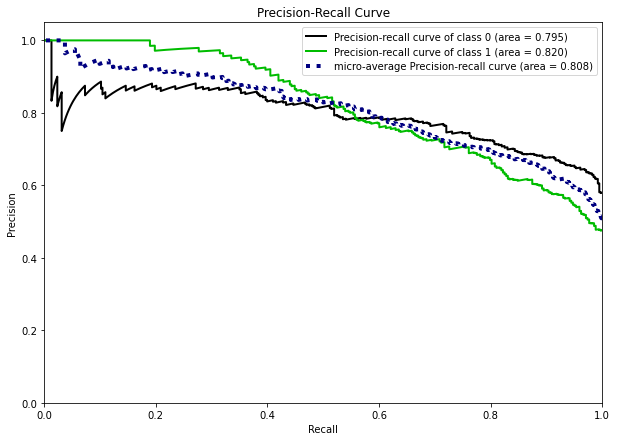

In [61]:
print_precrecCurve(learner,X_test,y_test)

In [62]:
# Esperimento 2: hyperparameters tuning with "recall_macro"    

check_params = {
    "n_neighbors": np.arange(3,30,2), 
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}

clf=KNeighborsClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, "recall_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = recall_macro------- 

> Fold = RepeatedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.830 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.790 (+/-0.015) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.772 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.758 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'

In [63]:
learner = KNeighborsClassifier(n_neighbors= 15, metric= 'manhattan', weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       383
           1       0.79      0.57      0.66       343

    accuracy                           0.72       726
   macro avg       0.74      0.71      0.71       726
weighted avg       0.73      0.72      0.71       726



In [64]:
# Esperimento 3: hyperparameters tuning with "precision_macro"    

check_params = {
    "n_neighbors": np.arange(3,30,2), 
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}

clf=KNeighborsClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, "precision_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = precision_macro------- 

> Fold = RepeatedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.836 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.802 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.786 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.776 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'unifo

In [65]:
learner = KNeighborsClassifier(n_neighbors= 29, metric= 'manhattan', weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       383
           1       0.81      0.57      0.67       343

    accuracy                           0.73       726
   macro avg       0.75      0.72      0.72       726
weighted avg       0.75      0.73      0.73       726

